In [3]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from scipy.special import expit

In [4]:
I = 21
r = [10, 23, 23, 26, 17, 5, 53, 55, 32, 46, 10, 8, 10, 8, 23, 0,3, 22, 15, 32, 3]
N = [39, 62, 81, 51, 39, 6, 74, 72, 51, 79, 13, 16, 30, 28, 45, 4, 12, 41, 30, 51, 7]
x1= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
x2= [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [13]:
from tqdm import tqdm
##GIBBS
#Entrée
nChain = 41000
alpha = np.zeros((nChain,4))
acceptAlpha = np.zeros(4)

betas = np.zeros((nChain,I))
acceptBeta = np.zeros(I)

tau = np.ones(nChain)
acceptTau = 0
for i in tqdm(range(1,nChain)):
  alpha[i] = alpha[i-1]

  #PROP ALPHA
  for a in range(4):
    alphaProp = alpha[i].copy()
    alphaProp[a] += np.random.normal(scale=0.1)
    logTop = -1/2 * alphaProp[a]**2/ 10**6
    logBottom = -1/2 * alpha[i,a]**2/ 10**6
    for j in range(I):
      X = np.array([1,x1[j],x2[j],x2[j]*x1[j]])

      pjProp =  1/(1+np.exp(-np.dot(X,alphaProp)-betas[i-1,j]))
      pj =  1/(1+np.exp(-np.dot(X,alpha[i])-betas[i-1,j]))
      logTop += r[j]*np.log(pjProp)+(N[j]-r[j])*np.log(1-pjProp)
      logBottom += r[j]*np.log(pj)+(N[j]-r[j])*np.log(1-pj)
    A = np.exp(logTop-logBottom)
    if np.random.uniform() <= A:
      alpha[i] = alphaProp.copy()
      acceptAlpha[a]+=1
  
  #PROP BETA
  betas[i]= betas[i-1]
  for j in range(I):
    X = np.array([1,x1[j],x2[j],x2[j]*x1[j]])
    betaProp = betas[i-1,j] + np.random.normal(scale=1)

    pjProp =  1/(1+np.exp(-np.dot(X,alpha[i])-betaProp))
    pj =  1/(1+np.exp(-np.dot(X,alpha[i])-betas[i-1,j]))

    logTop = -1/2 * betaProp**2 * tau[i] + r[j]*np.log(pjProp)+(N[j]-r[j])*np.log(1-pjProp)
    logBottom = -1/2 * betas[i,j]**2 * tau[i] + r[j]*np.log(pj)+(N[j]-r[j])*np.log(1-pj)

    A = np.exp(logTop-logBottom)
    if np.random.uniform() <= A:
      betas[i,j] = betaProp
      acceptBeta[j] += 1

  #PROP TAU
  tauProp = tau[i-1]*np.exp(np.random.normal(scale=1))

  logTop = -1.5*np.log(tauProp) - tauProp/2 * (betas[i,:]**2).sum() + np.log(tauProp) + I/2 * np.log(tauProp)
  logBottom = -1.5*np.log(tau[i-1]) - tau[i-1]/2 * (betas[i,:]**2).sum() + np.log(tau[i-1]) + I/2 * np.log(tau[i-1])

  A = np.exp(logTop-logBottom)
  if np.random.uniform() <= A and tauProp >= 0.01:
        tau[i] = tauProp
        acceptTau += 1
  else:
    tau[i] = tau[i-1]

acceptAlpha = acceptAlpha/nChain
acceptBeta = acceptBeta/nChain
acceptTau = acceptTau/nChain

100%|██████████| 40999/40999 [02:47<00:00, 244.52it/s]


In [14]:
print(np.mean(alpha,axis=0))
print(np.mean(tau))

[-0.44790726 -0.27302763  1.35216977 -0.73395785]
2.037342121482869


Taux d'acceptation alpha 0 = 0.6175365853658537


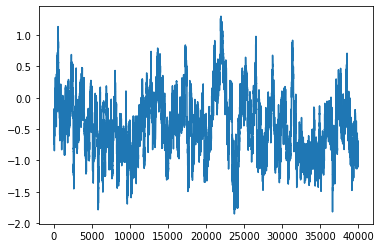

Taux d'acceptation alpha 1 = 0.7614634146341464


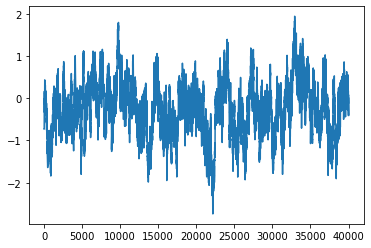

Taux d'acceptation alpha 2 = 0.7062195121951219


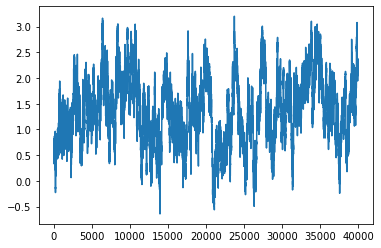

Taux d'acceptation alpha 3 = 0.821560975609756


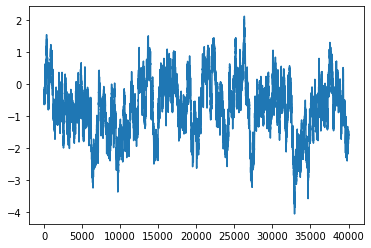

In [15]:
for i in range(4):
  plt.plot(range(nChain-1001),alpha[1001:,i])
  print(f"Taux d'acceptation alpha {i} = {acceptAlpha[i]}")
  plt.show()

Taux d'acceptation betas 0 = 0.38490243902439025


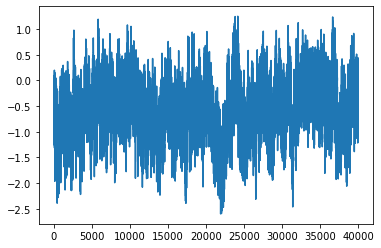

Taux d'acceptation betas 1 = 0.29953658536585365


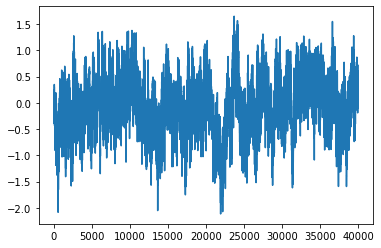

Taux d'acceptation betas 2 = 0.28309756097560973


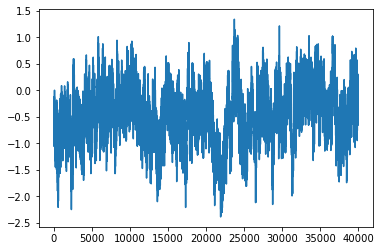

Taux d'acceptation betas 3 = 0.31639024390243903


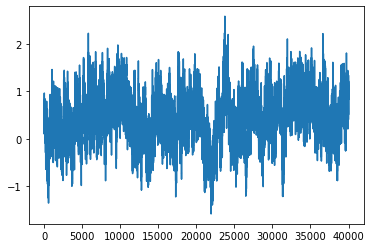

Taux d'acceptation betas 4 = 0.3513414634146341


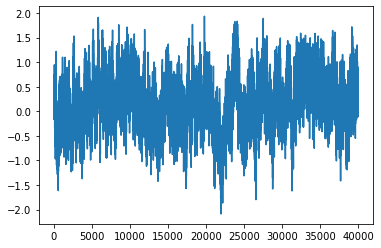

Taux d'acceptation betas 5 = 0.6124390243902439


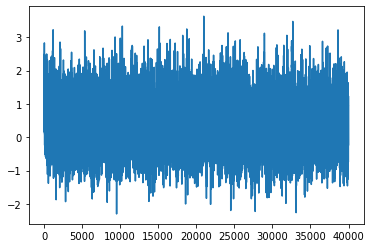

Taux d'acceptation betas 6 = 0.29609756097560974


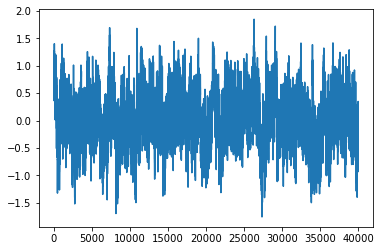

Taux d'acceptation betas 7 = 0.31278048780487805


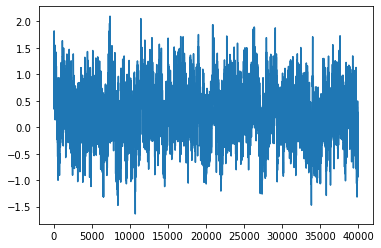

Taux d'acceptation betas 8 = 0.3268780487804878


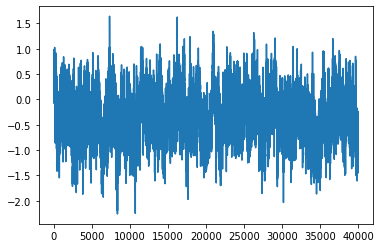

Taux d'acceptation betas 9 = 0.2667560975609756


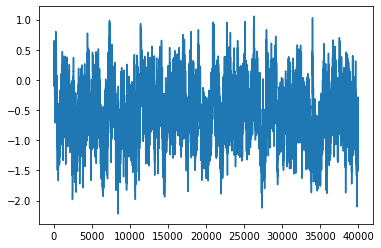

Taux d'acceptation betas 10 = 0.5299268292682927


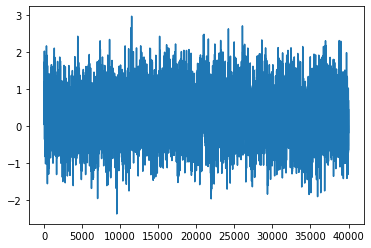

Taux d'acceptation betas 11 = 0.4715853658536585


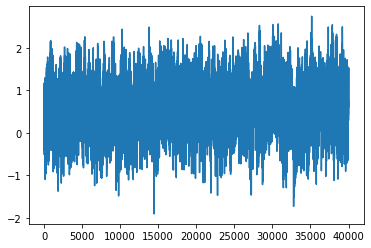

Taux d'acceptation betas 12 = 0.3996829268292683


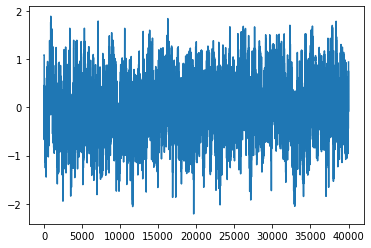

Taux d'acceptation betas 13 = 0.42134146341463413


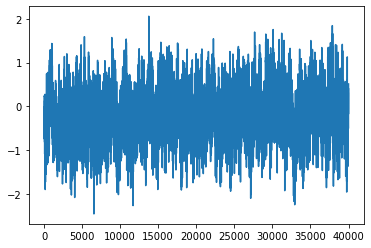

Taux d'acceptation betas 14 = 0.3291951219512195


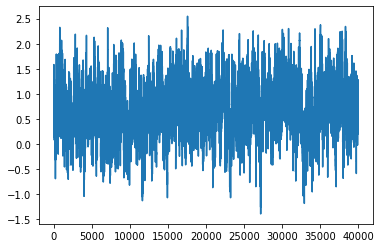

Taux d'acceptation betas 15 = 0.6416829268292683


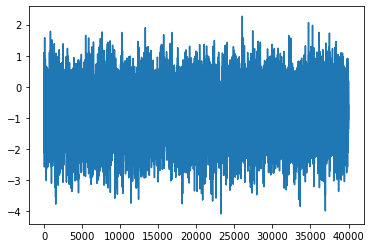

Taux d'acceptation betas 16 = 0.5222682926829268


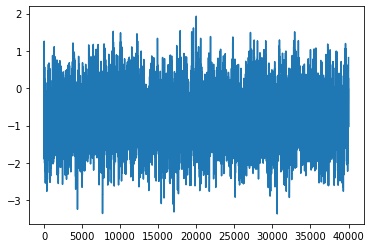

Taux d'acceptation betas 17 = 0.34812195121951217


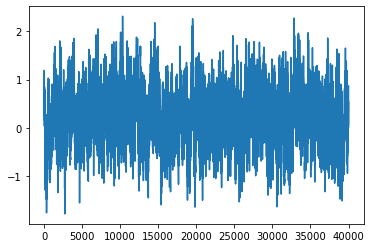

Taux d'acceptation betas 18 = 0.385609756097561


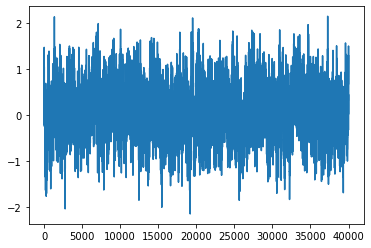

Taux d'acceptation betas 19 = 0.3250487804878049


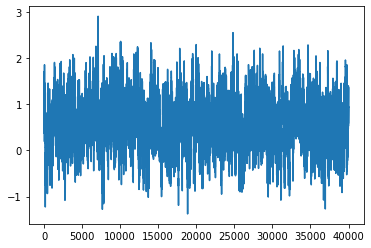

Taux d'acceptation betas 20 = 0.5644878048780487


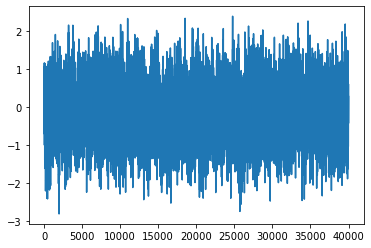

In [16]:
for i in range(I):
  plt.plot(range(nChain-1001),betas[1001:,i])
  print(f"Taux d'acceptation betas {i} = {acceptBeta[i]}")
  plt.show()

Taux d'acceptation tau = 0.39046341463414636
Tau moyen = 2.037890112355234


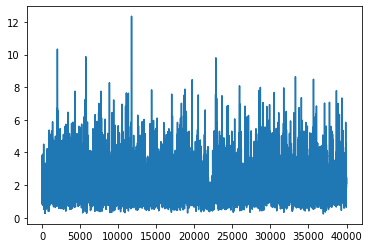

In [17]:
plt.plot(range(nChain-1001),tau[1001:])
print(f"Taux d'acceptation tau = {acceptTau}")
print(f"Tau moyen = {tau[1001:].mean()}")

In [8]:
alpha = np.ones((4))
print(alpha)
var = alpha[0]
var = 0
alpha

[1. 1. 1. 1.]


array([1., 1., 1., 1.])